# Explore selected biological signal

Ensure that the biological signal selected (i.e. PAO1 vs PA14, treatment vs no treatment) have a clear signal - clear separation in VAE latent space

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import random
import glob
from keras.models import model_from_json, load_model
import umap
import warnings
warnings.filterwarnings(action='once')

from ggplot import *

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap.py:222

In [2]:
# Parameters
NN_architecture = 'NN_2500_20'
metadata_field = 'strain'

In [3]:
# Load arguments
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

mapping_file = os.path.join(
    base_dir,
    "data",
    "metadata",
    "mapping_{}.txt".format(metadata_field))

normalized_data_file = os.path.join(
    base_dir,
    "data",
    "input",
    "train_set_normalized.pcl")

encoded_data_file = glob.glob(os.path.join(
    base_dir,
    "data",
    "encoded",
    NN_architecture,
    "*encoded.txt"))[0]

In [4]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)
normalized_data.head(10)

(950, 5549)


Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814
control1aerobic_Pae_G1a.CEL,0.365512,0.572967,0.417762,0.663096,0.424846,0.606590,0.378900,0.224257,0.161582,0.074461,...,0.491161,0.565151,0.595824,0.382989,0.352268,0.250905,0.362161,0.487777,0.729434,0.483384
control1_anaerobic_Pae_G1a.CEL,0.689254,0.723461,0.510094,0.801569,0.619374,0.937262,0.138600,0.298615,0.306533,0.032482,...,0.754845,0.711126,0.589279,0.542699,0.591066,0.421389,0.392671,0.686055,0.911163,0.585208
control2aerobic_Pae_G1a.CEL,0.353000,0.580626,0.302544,0.639624,0.281793,0.687343,0.462645,0.000000,0.107961,0.093163,...,0.466139,0.545104,0.487957,0.330583,0.419139,0.328478,0.298493,0.254059,0.588305,0.406311
control2_anaerobic_Pae_G1a.CEL,0.674305,0.680740,0.515478,0.747121,0.656701,0.910654,0.149744,0.262492,0.263528,0.019910,...,0.775338,0.653142,0.642205,0.550935,0.565532,0.458622,0.426767,0.701314,0.886074,0.556363
control3aerobic_Pae_G1a.CEL,0.399186,0.653977,0.328755,0.692895,0.482482,0.618446,0.308135,0.191401,0.201170,0.020375,...,0.560889,0.654797,0.493961,0.454766,0.464733,0.456465,0.348577,0.503229,0.718768,0.474649


In [5]:
# Read encoded data
encoded_data = pd.read_table(
    encoded_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(encoded_data.shape)
encoded_data.head(10)

(950, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
05_PA14000-4-2_5-10-07_S2.CEL,0.000000,0.000000,2.881807,4.025048,0.026121,0.000000,0.233073,0.000000,0.285552,0.000000,3.521488,2.349849,0.000000,0.221006,0.040035,0.119289,0.000000,2.267663,3.790878,0.622564
54375-4-05.CEL,0.271458,0.279838,5.314808,0.014325,0.023810,0.171173,0.294140,0.293523,0.000000,0.000000,0.000000,4.662211,0.000000,0.000000,0.221577,0.027970,1.871457,0.460128,0.651031,1.523954
AKGlu_plus_nt_7-8-09_s1.CEL,0.884178,0.000000,0.874608,5.964780,1.225151,0.000000,1.450733,0.000000,0.000000,0.544627,1.458417,1.502698,0.000000,0.311754,0.000000,0.169599,0.000000,3.467533,2.929476,0.000000
anaerobic_NO3_1.CEL,0.000000,7.119679,0.000000,6.034766,1.123290,1.156022,0.000000,0.000000,0.000000,0.572917,0.000000,0.000000,0.905534,0.226940,0.000000,0.498183,1.583261,0.000000,0.000000,0.000000
anaerobic_NO3_2.CEL,0.000000,7.092632,0.000000,6.480810,0.998179,0.939759,0.000000,0.000000,0.000000,0.597160,0.000000,0.000000,0.911045,0.139518,0.000000,0.508703,1.863557,0.000000,0.000000,0.000000
control1aerobic_Pae_G1a.CEL,0.000000,0.283649,0.000000,0.520822,4.961012,0.000000,0.000000,4.970084,1.993324,0.000000,0.679801,0.000000,3.124849,0.000000,0.100840,0.000000,0.161994,0.000000,0.000000,0.010050
control1_anaerobic_Pae_G1a.CEL,0.000000,0.000000,0.000000,0.171366,4.795333,0.000000,0.000000,5.076245,1.661616,0.000000,3.410705,0.000000,2.294760,0.000000,0.000000,0.000000,0.000000,0.000000,0.150745,2.953038
control2aerobic_Pae_G1a.CEL,0.000000,1.545221,0.000000,0.115196,5.243724,0.000000,0.000000,4.077643,2.369878,0.000000,0.000000,0.000000,3.325455,0.000000,0.550063,0.000000,0.410258,0.000000,0.000000,0.000000
control2_anaerobic_Pae_G1a.CEL,0.000000,0.000000,0.000000,0.091387,4.557496,0.000000,0.000000,5.016538,1.812587,0.000000,3.579182,0.000000,2.381885,0.000000,0.000000,0.000000,0.000000,0.158537,0.093915,2.600331
control3aerobic_Pae_G1a.CEL,0.000000,0.214737,0.000000,0.606456,5.336023,0.000000,0.000000,5.027914,1.547833,0.000000,0.815024,0.000000,3.292789,0.000000,0.000000,0.000000,0.343207,0.000000,0.000000,0.057345


In [6]:
# Read in metadata
metadata = pd.read_table(
    mapping_file, 
    header=0, 
    sep='\t', 
    index_col=0)

metadata_field = metadata.columns[0]

metadata.head(10)

,strain
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,PAO1
GSM1141729_PA01_none_PC_.CEL,PAO1
GSM1608059_Planktonic_1.CEL,PAO1
GSM1608060_Planktonic_2.CEL,PAO1
GSM1608061_Planktonic_3.CEL,PAO1
GSM1608062_Planktonic_4.CEL,PAO1
GSM1608067_Biofilm+12hrcipro_rep1.CEL,PAO1
GSM1608068_Biofilm+12hrcipro_rep2.CEL,PAO1
GSM1608069_Biofilm+12hrcipro_rep3.CEL,PAO1


## Plot input data using UAMP

In [7]:
# Merge gene expression data and metadata
data_labeled = normalized_data.merge(
    metadata,
    left_index=True, 
    right_index=True, 
    how='inner')

print(data_labeled.shape)
data_labeled.head(5)

(989, 5550)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,strain
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012,PA14
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374,PAO1
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099,PA14
DB1.CEL,0.256216,0.461307,0.396341,0.430438,0.398933,0.379887,0.652586,0.569757,0.375272,0.225683,...,0.538515,0.572184,0.568535,0.556461,0.623840,0.970830,0.503223,0.692651,0.386309,PAO1
DB3.CEL,0.320985,0.452921,0.231726,0.447838,0.335848,0.379614,0.252038,0.518413,0.441566,0.186477,...,0.544428,0.502996,0.429489,0.278100,0.541859,0.860111,0.533048,0.604709,0.433888,PAO1


In [8]:
# UMAP embedding of raw gene space data
embedding = umap.UMAP().fit_transform(data_labeled.iloc[:,1:-1])
embedding_df = pd.DataFrame(data=embedding, columns=['1','2'])
embedding_df['metadata'] = list(data_labeled[metadata_field])
print(embedding_df.shape)
embedding_df.head(5)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py:328: NumbaWarning: Function "fuzzy_simplicial_set" failed type inference: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py", line 443:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py:328: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.
  @numba.jit()
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 4 connected components using meta-embedding (experimental)
  n_components
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-package

(989, 3)


,1,2,metadata
0,12.776422,3.291242,PA14
1,8.242547,1.887760,PAO1
2,12.857047,3.230828,PA14
3,6.582257,-1.487800,PAO1
4,6.593350,-1.487609,PAO1


In [9]:
# Replace NaN with string "NA"
embedding_df['metadata'] = embedding_df.metadata.fillna('NA')

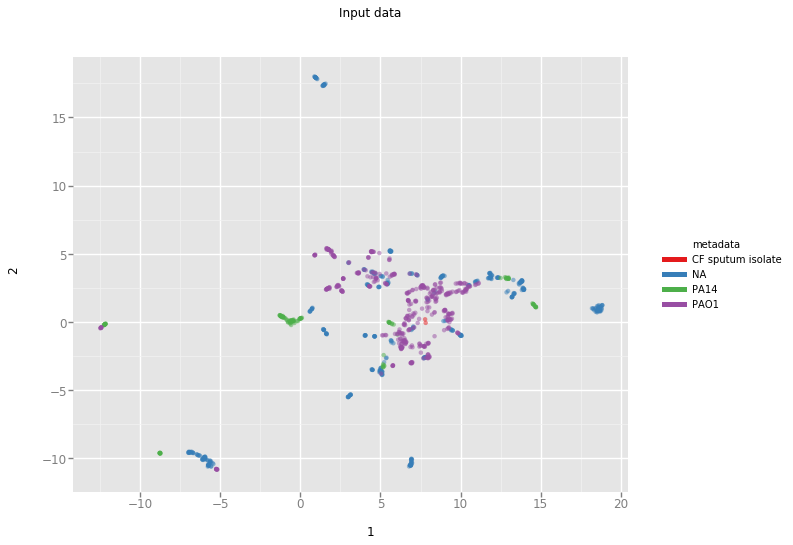

<ggplot: (-9223363248431647344)>

In [10]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette='Set1') + \
        ggtitle("Input data")

## Plot encoded data using UMAP

In [11]:
# Merge gene expression data and metadata
data_encoded_labeled = encoded_data.merge(
    metadata,
    left_index=True, 
    right_index=True, 
    how='inner')

print(data_encoded_labeled.shape)
data_encoded_labeled.head(5)

(989, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,strain
05_PA14000-4-2_5-10-07_S2.CEL,0.000000,0.000000,2.881807,4.025048,0.026121,0.000000,0.233073,0.000000,0.285552,0.000000,...,2.349849,0.000000,0.221006,0.040035,0.119289,0.000000,2.267663,3.790878,0.622564,PA14
54375-4-05.CEL,0.271458,0.279838,5.314808,0.014325,0.023810,0.171173,0.294140,0.293523,0.000000,0.000000,...,4.662211,0.000000,0.000000,0.221577,0.027970,1.871457,0.460128,0.651031,1.523954,PAO1
AKGlu_plus_nt_7-8-09_s1.CEL,0.884178,0.000000,0.874608,5.964780,1.225151,0.000000,1.450733,0.000000,0.000000,0.544627,...,1.502698,0.000000,0.311754,0.000000,0.169599,0.000000,3.467533,2.929476,0.000000,PA14
DB1.CEL,1.141864,0.190562,0.564505,0.000000,0.404298,0.152109,0.452906,0.000000,0.000000,0.524291,...,0.000000,0.048547,0.185864,4.968468,0.000000,0.300306,0.000000,0.000000,0.000000,PAO1
DB3.CEL,0.882203,1.506860,0.336201,0.000000,0.820061,0.103091,1.109043,0.000000,0.000000,0.987604,...,0.000000,0.176782,0.000000,4.485586,0.131439,0.000000,0.000000,0.000000,0.064667,PAO1


In [12]:
# UMAP embedding of raw gene space data
embedding_encoded = umap.UMAP().fit_transform(data_encoded_labeled.iloc[:,1:-1])
embedding_encoded_df = pd.DataFrame(data=embedding_encoded, columns=['1','2'])
embedding_encoded_df['metadata'] = list(data_encoded_labeled[metadata_field])
print(embedding_encoded_df.shape)
embedding_encoded_df.head(5)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 3 connected components using meta-embedding (experimental)
  n_components
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(989, 3)


,1,2,metadata
0,3.237502,4.802267,PA14
1,11.798750,-0.327835,PAO1
2,3.164606,4.748051,PA14
3,8.500706,-0.274004,PAO1
4,8.541258,-0.405811,PAO1


In [13]:
# Replace NaN with string "NA"
embedding_encoded_df['metadata'] = embedding_encoded_df.metadata.fillna('NA')

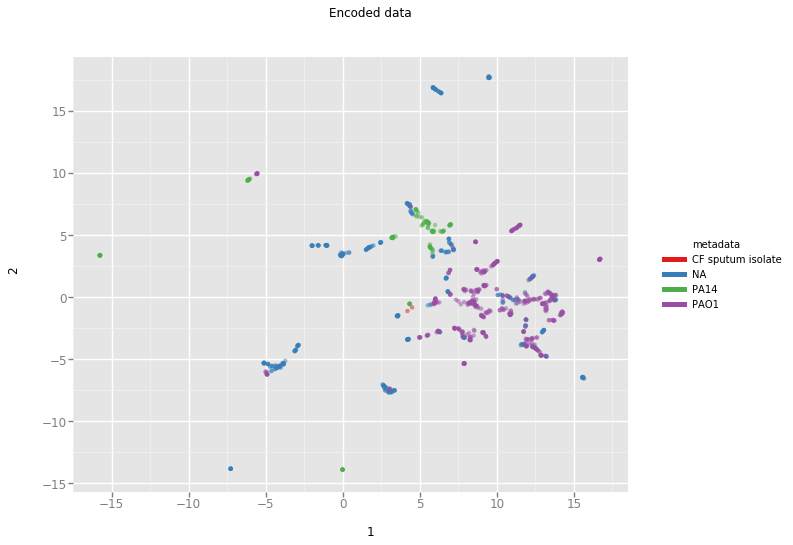

<ggplot: (8788423556265)>

In [14]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_encoded_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette='Set1') + \
        ggtitle("Encoded data")